# Dataset 1

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
data =pd.read_csv('dataset.csv')

In [7]:
data.sample(10)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
2129,Diabetes,fatigue,weight_loss,restlessness,lethargy,irregular_sugar_level,blurred_and_distorted_vision,obesity,increased_appetite,polyuria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4485,Chicken pox,itching,skin_rash,fatigue,lethargy,high_fever,headache,loss_of_appetite,mild_fever,swelled_lymph_nodes,malaise,red_spots_over_body,NaN,NaN,NaN,NaN,NaN,NaN
4777,Hepatitis C,fatigue,yellowish_skin,nausea,loss_of_appetite,yellowing_of_eyes,family_history,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4486,Dengue,skin_rash,chills,joint_pain,vomiting,fatigue,high_fever,headache,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,malaise,muscle_pain,red_spots_over_body,NaN,NaN,NaN
2221,Dengue,skin_rash,chills,joint_pain,vomiting,fatigue,high_fever,headache,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,malaise,red_spots_over_body,NaN,NaN,NaN,NaN
592,Typhoid,chills,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,diarrhoea,toxic_look_(typhos),belly_pain,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2315,Common Cold,continuous_sneezing,chills,fatigue,high_fever,headache,swelled_lymph_nodes,malaise,phlegm,throat_irritation,redness_of_eyes,sinus_pressure,runny_nose,congestion,chest_pain,loss_of_smell,muscle_pain,NaN
4767,Migraine,acidity,indigestion,headache,blurred_and_distorted_vision,excessive_hunger,stiff_neck,depression,irritability,visual_disturbances,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3791,hepatitis A,joint_pain,vomiting,yellowish_skin,dark_urine,nausea,loss_of_appetite,abdominal_pain,diarrhoea,mild_fever,yellowing_of_eyes,muscle_pain,NaN,NaN,NaN,NaN,NaN,NaN
1991,Arthritis,muscle_weakness,stiff_neck,swelling_joints,movement_stiffness,painful_walking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


Creating a word bank of symptoms


In [12]:
all_symptoms = []
for index, row in data.iterrows():
    symptoms = row.dropna().tolist()[1:]  # Exclude the disease column
    all_symptoms.extend(symptoms)
all_symptoms

['itching',
 ' skin_rash',
 ' nodal_skin_eruptions',
 ' dischromic _patches',
 ' skin_rash',
 ' nodal_skin_eruptions',
 ' dischromic _patches',
 'itching',
 ' nodal_skin_eruptions',
 ' dischromic _patches',
 'itching',
 ' skin_rash',
 ' dischromic _patches',
 'itching',
 ' skin_rash',
 ' nodal_skin_eruptions',
 ' skin_rash',
 ' nodal_skin_eruptions',
 ' dischromic _patches',
 'itching',
 ' nodal_skin_eruptions',
 ' dischromic _patches',
 'itching',
 ' skin_rash',
 ' dischromic _patches',
 'itching',
 ' skin_rash',
 ' nodal_skin_eruptions',
 'itching',
 ' skin_rash',
 ' nodal_skin_eruptions',
 ' dischromic _patches',
 ' continuous_sneezing',
 ' shivering',
 ' chills',
 ' watering_from_eyes',
 ' shivering',
 ' chills',
 ' watering_from_eyes',
 ' continuous_sneezing',
 ' chills',
 ' watering_from_eyes',
 ' continuous_sneezing',
 ' shivering',
 ' watering_from_eyes',
 ' continuous_sneezing',
 ' shivering',
 ' chills',
 ' shivering',
 ' chills',
 ' watering_from_eyes',
 ' continuous_sneezin

In [13]:
unique_symptoms = list(set(all_symptoms))
unique_symptoms

[' irritability',
 ' drying_and_tingling_lips',
 ' continuous_sneezing',
 ' weight_loss',
 ' cramps',
 ' congestion',
 ' chest_pain',
 ' yellowish_skin',
 ' blurred_and_distorted_vision',
 ' receiving_blood_transfusion',
 ' knee_pain',
 ' swollen_extremeties',
 ' blood_in_sputum',
 ' polyuria',
 ' excessive_hunger',
 ' enlarged_thyroid',
 ' swelling_of_stomach',
 ' malaise',
 ' silver_like_dusting',
 ' runny_nose',
 ' skin_peeling',
 ' visual_disturbances',
 ' palpitations',
 ' irregular_sugar_level',
 ' dischromic _patches',
 ' toxic_look_(typhos)',
 ' muscle_weakness',
 ' loss_of_balance',
 ' lack_of_concentration',
 ' obesity',
 ' muscle_pain',
 ' altered_sensorium',
 ' dehydration',
 ' sweating',
 ' anxiety',
 ' depression',
 ' yellowing_of_eyes',
 ' pain_behind_the_eyes',
 ' breathlessness',
 ' movement_stiffness',
 ' headache',
 ' mild_fever',
 ' yellow_urine',
 ' spinning_movements',
 ' phlegm',
 ' passage_of_gases',
 ' dark_urine',
 ' shivering',
 ' redness_of_eyes',
 ' burning

In [15]:
# Clean data (remove special characters, extra spaces, etc.)
cleaned_symptoms = [symptom.replace("_", " ").strip() for symptom in unique_symptoms]
cleaned_symptoms

['irritability',
 'drying and tingling lips',
 'continuous sneezing',
 'weight loss',
 'cramps',
 'congestion',
 'chest pain',
 'yellowish skin',
 'blurred and distorted vision',
 'receiving blood transfusion',
 'knee pain',
 'swollen extremeties',
 'blood in sputum',
 'polyuria',
 'excessive hunger',
 'enlarged thyroid',
 'swelling of stomach',
 'malaise',
 'silver like dusting',
 'runny nose',
 'skin peeling',
 'visual disturbances',
 'palpitations',
 'irregular sugar level',
 'dischromic  patches',
 'toxic look (typhos)',
 'muscle weakness',
 'loss of balance',
 'lack of concentration',
 'obesity',
 'muscle pain',
 'altered sensorium',
 'dehydration',
 'sweating',
 'anxiety',
 'depression',
 'yellowing of eyes',
 'pain behind the eyes',
 'breathlessness',
 'movement stiffness',
 'headache',
 'mild fever',
 'yellow urine',
 'spinning movements',
 'phlegm',
 'passage of gases',
 'dark urine',
 'shivering',
 'redness of eyes',
 'burning micturition',
 'pain in anal region',
 'internal 

In [16]:
# Tokenization
tokens = []
for symptom in cleaned_symptoms:
    tokens.extend(symptom.split())
tokens

['irritability',
 'drying',
 'and',
 'tingling',
 'lips',
 'continuous',
 'sneezing',
 'weight',
 'loss',
 'cramps',
 'congestion',
 'chest',
 'pain',
 'yellowish',
 'skin',
 'blurred',
 'and',
 'distorted',
 'vision',
 'receiving',
 'blood',
 'transfusion',
 'knee',
 'pain',
 'swollen',
 'extremeties',
 'blood',
 'in',
 'sputum',
 'polyuria',
 'excessive',
 'hunger',
 'enlarged',
 'thyroid',
 'swelling',
 'of',
 'stomach',
 'malaise',
 'silver',
 'like',
 'dusting',
 'runny',
 'nose',
 'skin',
 'peeling',
 'visual',
 'disturbances',
 'palpitations',
 'irregular',
 'sugar',
 'level',
 'dischromic',
 'patches',
 'toxic',
 'look',
 '(typhos)',
 'muscle',
 'weakness',
 'loss',
 'of',
 'balance',
 'lack',
 'of',
 'concentration',
 'obesity',
 'muscle',
 'pain',
 'altered',
 'sensorium',
 'dehydration',
 'sweating',
 'anxiety',
 'depression',
 'yellowing',
 'of',
 'eyes',
 'pain',
 'behind',
 'the',
 'eyes',
 'breathlessness',
 'movement',
 'stiffness',
 'headache',
 'mild',
 'fever',
 'yel

In [20]:
# Word Frequency
word_freq = {}
for token in cleaned_symptoms:
    word_freq[token] = word_freq.get(token, 0) + 1
word_freq

{'irritability': 1,
 'drying and tingling lips': 1,
 'continuous sneezing': 1,
 'weight loss': 1,
 'cramps': 1,
 'congestion': 1,
 'chest pain': 1,
 'yellowish skin': 1,
 'blurred and distorted vision': 1,
 'receiving blood transfusion': 1,
 'knee pain': 1,
 'swollen extremeties': 1,
 'blood in sputum': 1,
 'polyuria': 1,
 'excessive hunger': 1,
 'enlarged thyroid': 1,
 'swelling of stomach': 1,
 'malaise': 1,
 'silver like dusting': 1,
 'runny nose': 1,
 'skin peeling': 1,
 'visual disturbances': 1,
 'palpitations': 1,
 'irregular sugar level': 1,
 'dischromic  patches': 1,
 'toxic look (typhos)': 1,
 'muscle weakness': 1,
 'loss of balance': 1,
 'lack of concentration': 1,
 'obesity': 1,
 'muscle pain': 1,
 'altered sensorium': 1,
 'dehydration': 1,
 'sweating': 1,
 'anxiety': 1,
 'depression': 1,
 'yellowing of eyes': 1,
 'pain behind the eyes': 1,
 'breathlessness': 1,
 'movement stiffness': 1,
 'headache': 1,
 'mild fever': 1,
 'yellow urine': 1,
 'spinning movements': 1,
 'phlegm

In [21]:
# Create Word Bank
word_bank = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

In [22]:
for word, freq in word_bank:
    print(f"{word}: {freq}")

irritability: 1
drying and tingling lips: 1
continuous sneezing: 1
weight loss: 1
cramps: 1
congestion: 1
chest pain: 1
yellowish skin: 1
blurred and distorted vision: 1
receiving blood transfusion: 1
knee pain: 1
swollen extremeties: 1
blood in sputum: 1
polyuria: 1
excessive hunger: 1
enlarged thyroid: 1
swelling of stomach: 1
malaise: 1
silver like dusting: 1
runny nose: 1
skin peeling: 1
visual disturbances: 1
palpitations: 1
irregular sugar level: 1
dischromic  patches: 1
toxic look (typhos): 1
muscle weakness: 1
loss of balance: 1
lack of concentration: 1
obesity: 1
muscle pain: 1
altered sensorium: 1
dehydration: 1
sweating: 1
anxiety: 1
depression: 1
yellowing of eyes: 1
pain behind the eyes: 1
breathlessness: 1
movement stiffness: 1
headache: 1
mild fever: 1
yellow urine: 1
spinning movements: 1
phlegm: 1
passage of gases: 1
dark urine: 1
shivering: 1
redness of eyes: 1
burning micturition: 1
pain in anal region: 1
internal itching: 1
coma: 1
nausea: 1
weakness of one body sid

In [29]:
len(word_bank)

131

In [32]:
# Extract unique symptoms
all_symptoms = set()
for col in data.columns[1:]:
    all_symptoms.update(data[col].dropna())


In [37]:
all_symptoms = list(all_symptoms)

In [38]:

# Create a dictionary to store symptoms for each disease
disease_symptoms = {}
for index, row in data.iterrows():
    disease = row['Disease']
    symptoms = row.dropna().tolist()[1:]
    disease_symptoms[disease] = set(symptoms)


In [39]:

# Create a matrix where rows are diseases and columns are symptoms
disease_symptom_matrix = []
for disease in disease_symptoms.keys():
    disease_symptom_matrix.append([1 if symptom in disease_symptoms[disease] else 0 for symptom in all_symptoms])


In [40]:

# Create a DataFrame from the matrix
df = pd.DataFrame(disease_symptom_matrix, columns=all_symptoms, index=disease_symptoms.keys())



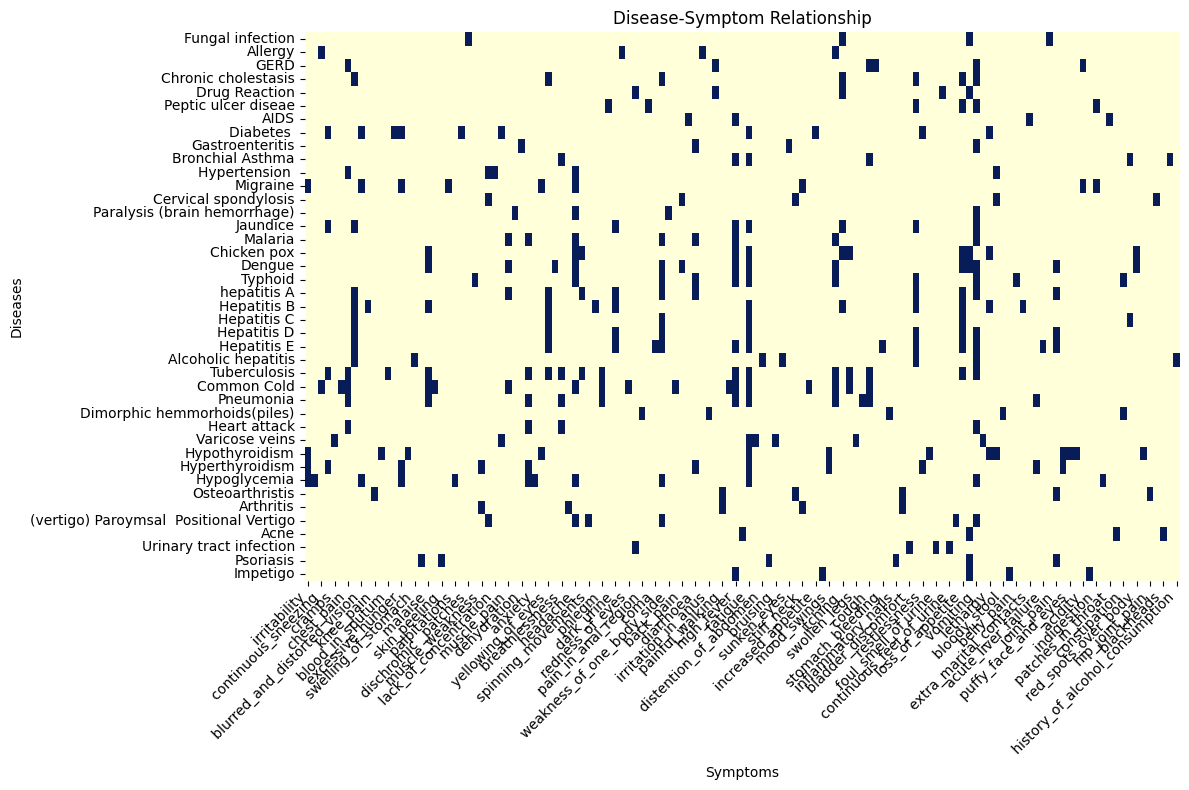

In [41]:

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df, cmap="YlGnBu", cbar=False)
plt.title('Disease-Symptom Relationship')
plt.xlabel('Symptoms')
plt.ylabel('Diseases')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [46]:
all_diseases = set(data['Disease'])

In [45]:
symptom_vectorizer = TfidfVectorizer()
disease_vectorizer = TfidfVectorizer()

In [47]:
symptom_vectorizer.fit(all_symptoms)
disease_vectorizer.fit(all_diseases)


TfidfVectorizer()

In [48]:
symptom_tfidf_matrix = symptom_vectorizer.transform(all_symptoms)
disease_tfidf_matrix = disease_vectorizer.transform(all_diseases)

In [49]:
symptom_tfidf_df = pd.DataFrame(symptom_tfidf_matrix.toarray(), columns=symptom_vectorizer.get_feature_names_out())
disease_tfidf_df = pd.DataFrame(disease_tfidf_matrix.toarray(), columns=disease_vectorizer.get_feature_names_out())


In [51]:
# Visualize TF-IDF matrices for symptoms and diseases
print("TF-IDF Matrix for Symptoms:")
print(symptom_tfidf_df.head())


TF-IDF Matrix for Symptoms:
   _patches  abdominal_pain  abnormal_menstruation  acidity  \
0       0.0             0.0                    0.0      0.0   
1       0.0             0.0                    0.0      0.0   
2       0.0             0.0                    0.0      0.0   
3       0.0             0.0                    0.0      0.0   
4       0.0             0.0                    0.0      0.0   

   acute_liver_failure  altered_sensorium  anxiety  back_pain  belly_pain  \
0                  0.0                0.0      0.0        0.0         0.0   
1                  0.0                0.0      0.0        0.0         0.0   
2                  0.0                0.0      0.0        0.0         0.0   
3                  0.0                0.0      0.0        0.0         0.0   
4                  0.0                0.0      0.0        0.0         0.0   

   blackheads  ...  vomiting  watering_from_eyes  weakness_in_limbs  \
0         0.0  ...       0.0                 0.0           

In [52]:

print("\nTF-IDF Matrix for Diseases:")
print(disease_tfidf_df.head())


TF-IDF Matrix for Diseases:
   acne  aids  alcoholic  allergy  arthritis  asthma  attack  brain  \
0   0.0   0.0        0.0      0.0        0.0     0.0     0.0    0.0   
1   0.0   0.0        0.0      1.0        0.0     0.0     0.0    0.0   
2   0.0   0.0        0.0      0.0        0.0     0.0     0.0    0.0   
3   0.0   0.0        0.0      0.0        0.0     0.0     0.0    0.0   
4   0.0   0.0        0.0      0.0        0.0     0.0     0.0    0.0   

   bronchial  cervical  ...  reaction  spondylosis  tract  tuberculosis  \
0        0.0       0.0  ...       0.0          0.0    0.0           0.0   
1        0.0       0.0  ...       0.0          0.0    0.0           0.0   
2        0.0       0.0  ...       0.0          0.0    0.0           0.0   
3        0.0       0.0  ...       0.0          0.0    0.0           0.0   
4        0.0       0.0  ...       0.0          0.0    0.0           0.0   

   typhoid  ulcer  urinary  varicose  veins   vertigo  
0      0.0    0.0      0.0       0.0 